### Why is Polynomial Linear Regression "Linear" ? 

The answer lies the equation on how polynomial linear regression is implemented. The outcome y is defined as the linear combination of the independent variables. That's the reason it is linear. The outcome has nothing to do with the non-linearities in the independent variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:, 1:2]   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 2]

df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [2]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

### Add Polynomial features using PolynomialFeatures class from sklearn.preprocessing

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_2 = PolynomialFeatures(degree=2)
poly_reg_3 = PolynomialFeatures(degree=3)
X_poly_2 = poly_reg_2.fit_transform(X)
X_poly_3 = poly_reg_3.fit_transform(X)

In [4]:
X_poly_2

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

#### Notice that the first column containing 1 is already added automatically
#### Now we can make LinearRegression object using these newly added polynomial features

In [5]:
lin_reg_poly_2 = LinearRegression().fit(X_poly_2, y)
lin_reg_poly_3 = LinearRegression().fit(X_poly_3, y)

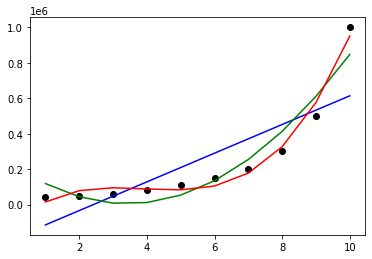

In [6]:
plt.scatter(X, y, color='black')
plt.plot(X, lin_reg.predict(X), color='b')
plt.plot(X, lin_reg_poly_2.predict(poly_reg_2.fit_transform(X)), color='g')
plt.plot(X, lin_reg_poly_3.predict(poly_reg_3.fit_transform(X)), color='r')
plt.show()